<a href="https://colab.research.google.com/github/Marcecr/Entrega_11/blob/main/Kfold_cross__validation_desafio_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

texto en cursiva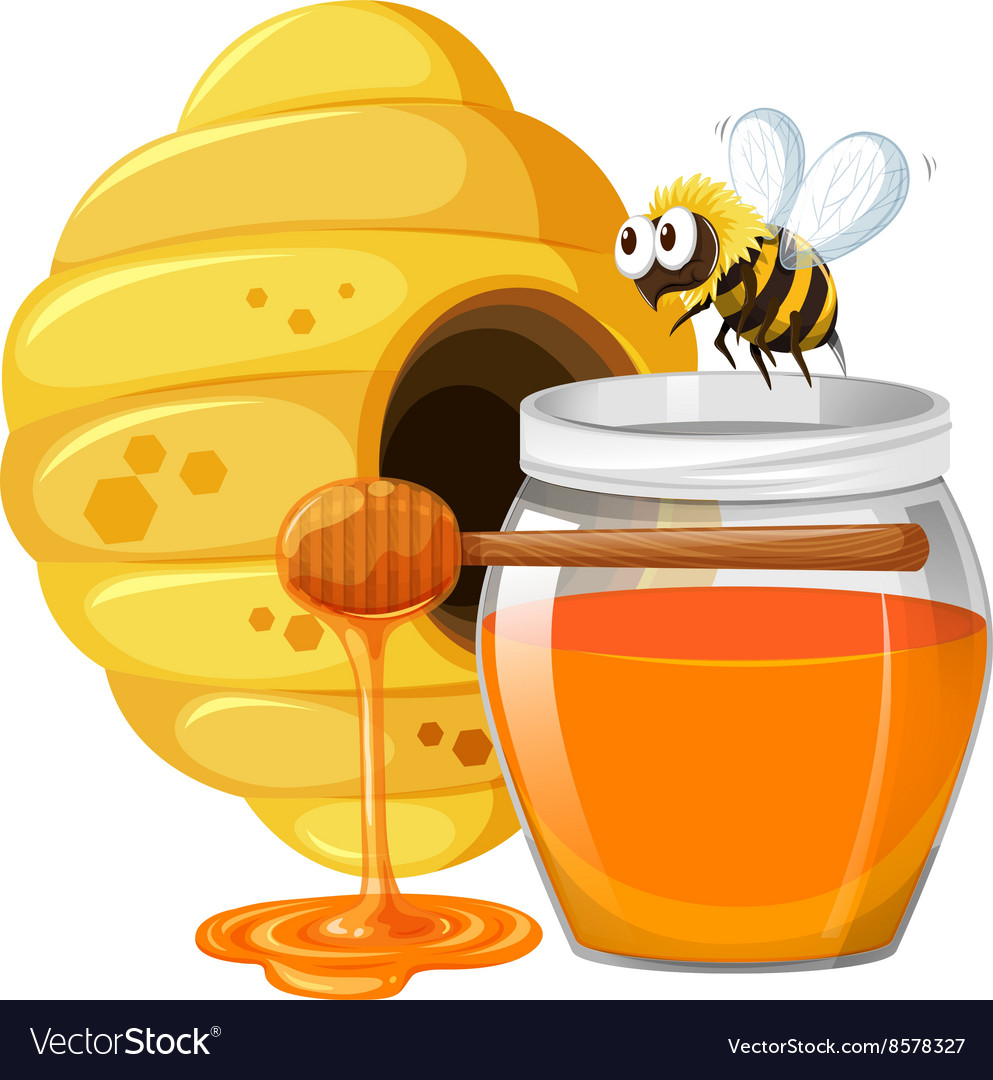

# ANALISIS DE DATOS EXPLORATORIO DE LA PRODUCCION DE MIEL ENTRE 1998-2016 EN EEUU **texto en negrita**
Resumen texto en negrita Las abejas son insectos de gran importantes en el planeta, dedibo a que ellas son responsbles de polinizar diferentes plantas importantes para la alimentacion del ser humano. Ellas se alimentan del polen y de nectar de las plantas , estos dos productos gozan de diferentes propiedad como lo son antioxidantes , antiflamatorio y antibioticos, por esta razon la miel ha sido cosechada, almacenada y comercializada desde los incionos de la humanidad hace mas de 6000 años. Esta base datos(Dataset), corresponde a la producion, demanda y oferta de miel de la abeja Apis mellifera, de distintos estados de EEUU. La informacion fue recolectada por la empresa Statistal(https://www.statista.com/statistics/593656/us-honey-production-volume/ ) y se encuentra en un archivo CSV(US_honey_dataset_updated) con 785 y 8 columnas.

Objetivo Visualizar cómo ha cambiado la producción de miel a lo largo de los años (1998-2016) en Estados Unidos.

Hipotesis: H0: No es Alabama el estado que mas produjo miel. HA: Es Alabama el estado que mas produjo miel. De acuerdo con el analisis DCA es Norte de Dakota

H0:No fue el año 2008 fue el año de mas produccion de miel de todos los estados evaluados. HA:El año 2008 fue el año de mas produccion de miel de todos los estados evaluados.

Fue 1998

Preguntas :

1.¿Cómo ha cambiado el rendimiento de la producción de miel de 1998 a 2016? A lo largo del tiempo, 2.¿cuáles han sido las principales tendencias de producción en los distintos estados? 3.¿Existen patrones que puedan observarse entre la producción total de miel y el valor de la producción cada año? 4.¿Cómo ha cambiado cada año el valor de la producción, estara vinculado a la demanda?

Cada registro contiene 9 caracteristicas. Las columnas son: 0 Unname 1 estado = state (categorica)
2 numero_colonias = numcol (numerica)
3 Producion_por_colonia = yieldpercol(numerica) 4 production = totalprod (numerica)
5 existencia = stocks (numerica)
6 promedio_precio = priceperlb (numerica)
7 value_of_production = prodvalue (numerica) 8 año = year (numerica)

Se importan librerias y se carga el dataset que se estudiara.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from mpl_toolkits import mplot3d
import datetime as dt
import plotly.offline as py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS/honeyproduction1998-2016.csv')

In [ ]:
df.shape

(785, 8)

In [ ]:
df.head() # Con esta funcion vemos los primeros 5 registros del dataset

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [ ]:
df['year'].nunique()## Numero de años evaluados

19

In [ ]:
df.dtypes## Exploramos el tipo de varaiables  para asegurarnos que los datos se lean bien.

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
780    False
781    False
782    False
783    False
784    False
Length: 785, dtype: bool

In [ ]:
# Eliminar filas que contienen al menos un valor nulo
df_sin_nulos = df.dropna()

# Eliminar columnas que contienen al menos un valor nulo
df_sin_nulos_columnas = df.dropna(axis=1)

In [ ]:
df_sin_nulos.shape

(785, 8)

# *Exploración de las variables estudiadas,establecemos correlaciones entre ellas.*

In [ ]:
correlation = df.corr() # creating a 2-D Matrix with correlation plots
correlation

<ipython-input-153-93646883673a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
numcol,1.000000,0.224539,0.951822,0.820076,-0.211427,0.898989,0.026711
yieldpercol,0.224539,1.000000,0.382945,0.358676,-0.360571,0.255789,-0.248737
totalprod,0.951822,0.382945,1.000000,0.876872,-0.239085,0.895242,-0.040497
stocks,0.820076,0.358676,0.876872,1.000000,-0.275926,0.713161,-0.115520
priceperlb,-0.211427,-0.360571,-0.239085,-0.275926,1.000000,-0.061833,0.733959
prodvalue,0.898989,0.255789,0.895242,0.713161,-0.061833,1.000000,0.188790
year,0.026711,-0.248737,-0.040497,-0.115520,0.733959,0.188790,1.000000


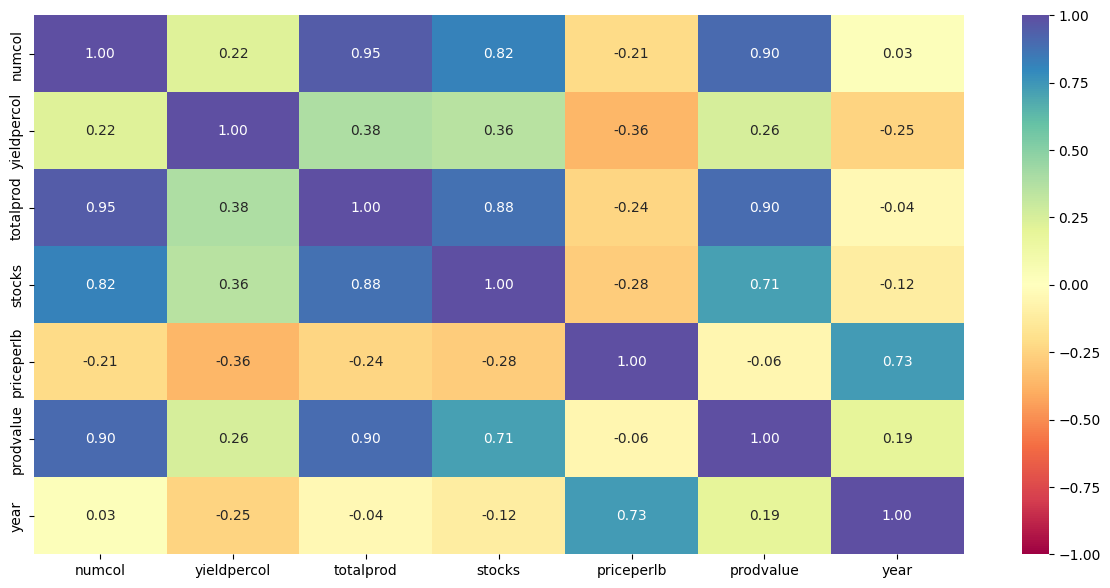

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

# **Limpieza de Outliers**

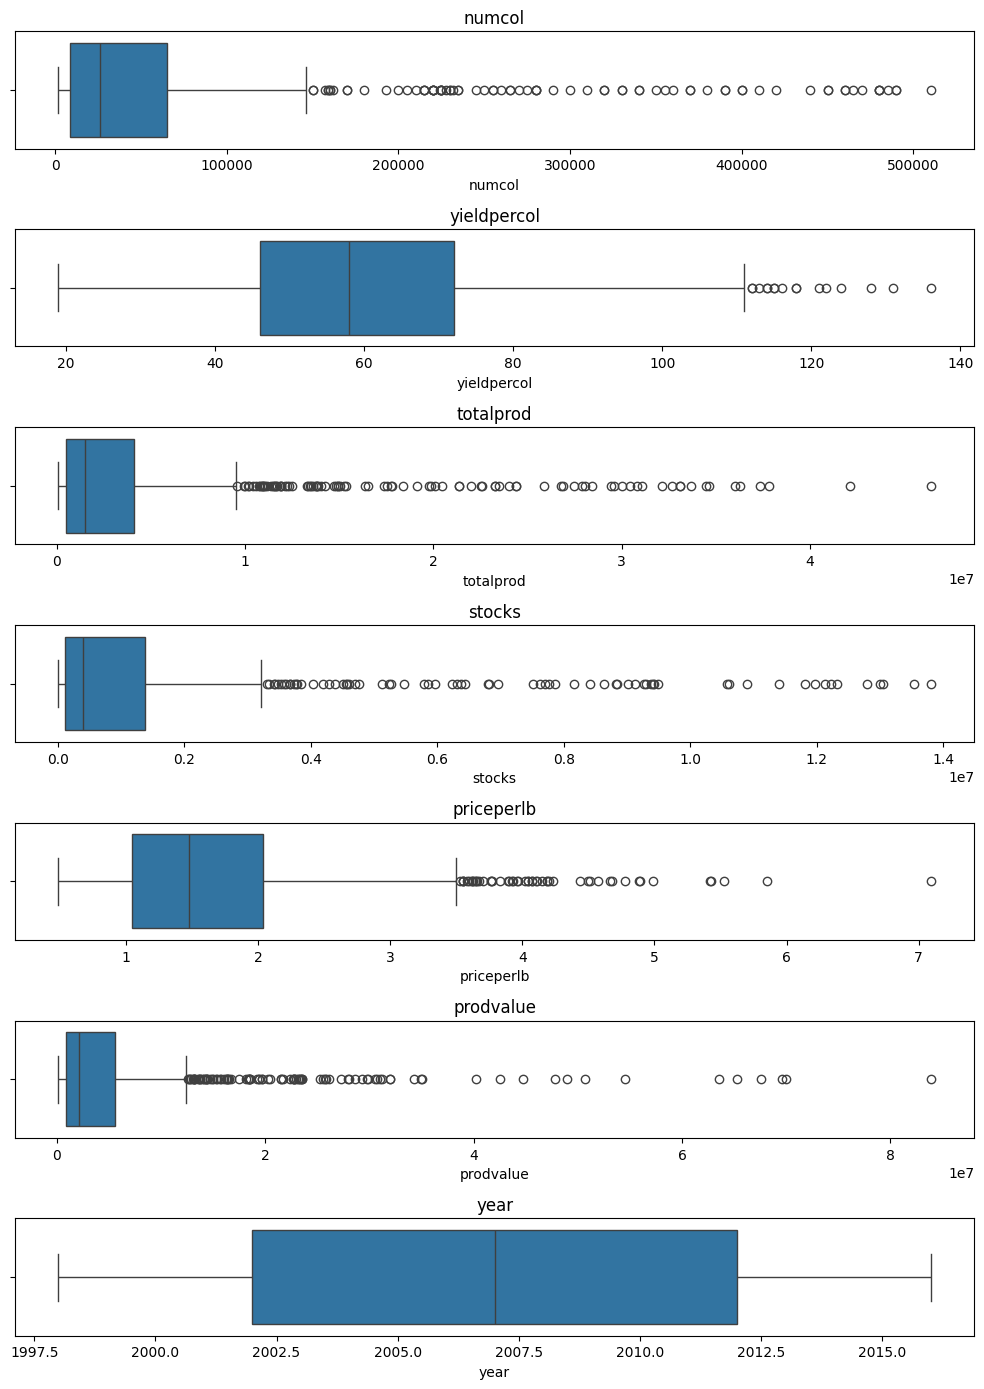

In [ ]:
## Grafiqueramos las variables con boxplot,de esta manera miraremos la distribucion de los datos.
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Crear subgráficos
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(10, 2*len(num_cols)))

# Generar boxplots individuales
for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


In [ ]:
!pip install pandas

In [ ]:
# Lista de columnas con outliers
columns_with_outliers = ['numcol', 'yieldpercol', 'totalprod', 'stocks',
                          'priceperlb','prodvalue']

# Definir una función para eliminar outliers basados en el IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Eliminar outliers en las columnas especificadas
for col in columns_with_outliers:
    df = remove_outliers(df, col)

# Ahora df no tiene outliers en las columnas especificadas

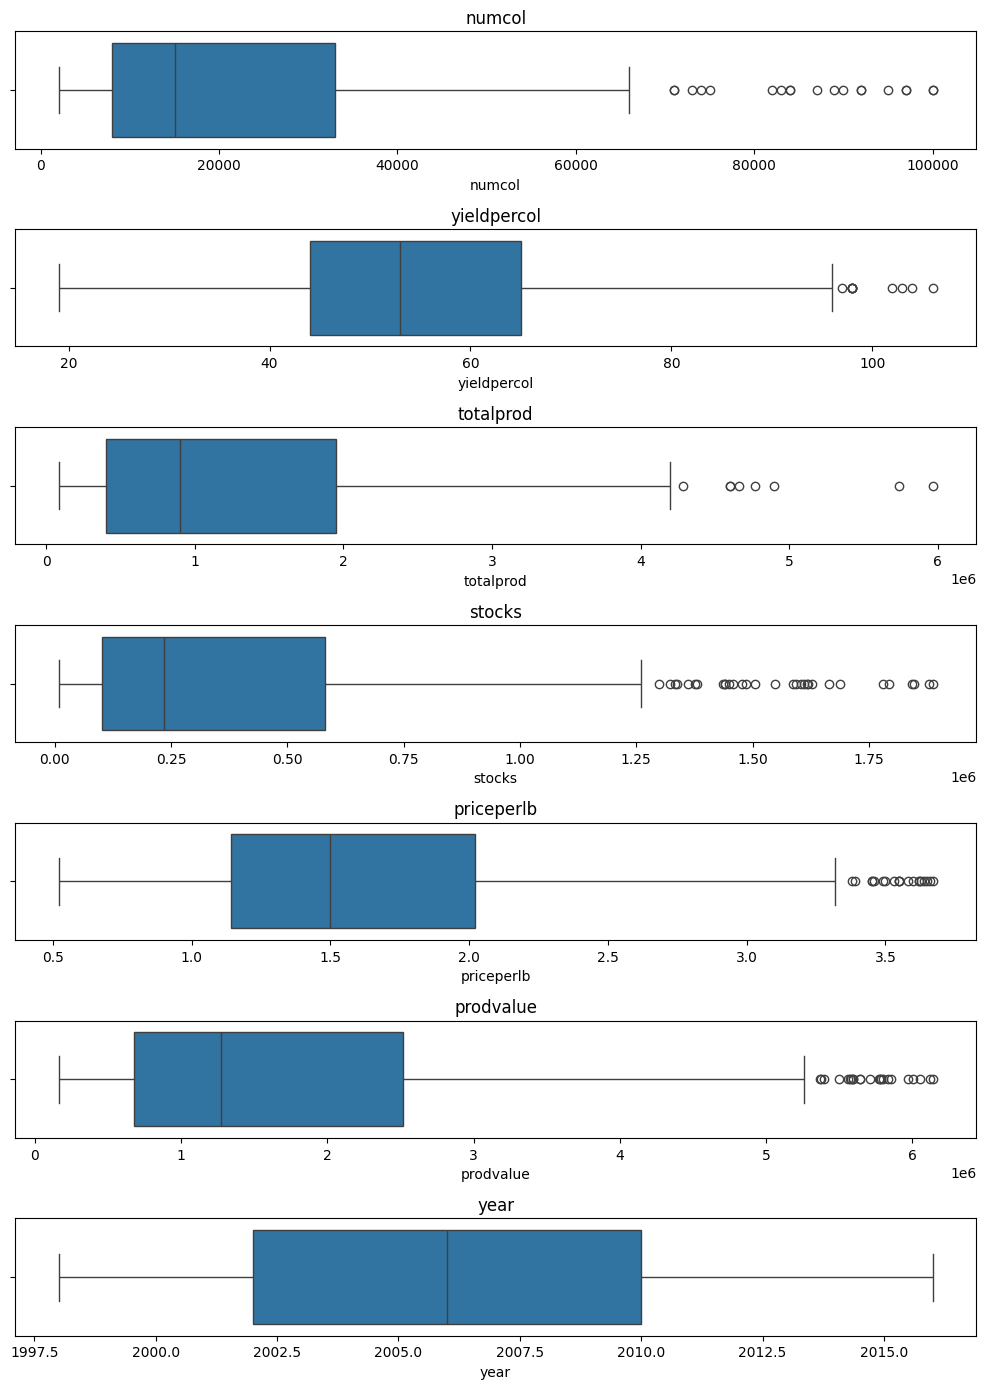

In [ ]:

# Ahora df no tiene outliers en las columnas especificadas
df_numeric = df.select_dtypes(include='number')
# Supongamos que df es tu DataFrame
num_cols = df_numeric.select_dtypes(include=['float64', 'int64']).columns

# Crear subgráficos
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(10, 2*len(num_cols)))

# Generar boxplots individuales
for i, col in enumerate(num_cols):
    sns.boxplot(x=df_numeric[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

# **MACHINE LEARNING**
Vamos a evaluar diferentes modelos de aprendizaje supervisado entre los modelos a evaluar tenemos:
Supervisados
1. Regresion Lineal
Este modelo asume la relación entre dos variables,una variable dependiente y una o mas independientes.
𝒀= βo + β1𝒳1 + βn𝒳n + 𝙴

Donde y es la variable que queremos predecir
X son las variables independientes.
β son los coeficientes de Regresión.
ℇ es el error.
 2.KNeighborsRegressor
 Este algoritmo se basa en el concepto de "vecinos más cercanos" para realizar predicciones de una nueva instancia (o punto de datos) desconocida, se buscan los k puntos de datos más cercanos en el conjunto de entrenamiento y se promedia (o se pondera) sus valores de salida para obtener la predicción final.

 3.DecisionTreeRegressor
  Es un algoritmo  que divide repetidamente el espacio de características en regiones más pequeñas y más homogéneas, y predice el valor medio de las instancias en cada región como la salida.
 La idea principal detrás de DecisionTreeRegressor es dividir el espacio de características en nodos de decisión, de manera que las instancias que caen en el mismo nodo compartan características similares.

 4.RandomForestClassifier
Algoritmo de aprendizaje que se utiliza en   clasificación en machine learning. Este algoritmo pertenece a la categoría de modelos de conjunto (ensemble), que combinan múltiples modelos más simples para mejorar el rendimiento predictivo.

No supervisado
PCA
Algoritmo de clasificación, que se utiliza en la reducción de dimensionalidad de datos , reducción de ruido y la redundacncia de los datos y la extraccion de caracterictas importantes para el modelo predictivo.

In [ ]:
### Primero correr pip install scikit-learn en la Terminal o CMD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# **MODELO REGRESIÓN LINEAL**

In [ ]:
df.columns

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')

In [ ]:
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,521.000000,521.000000,5.210000e+02,5.210000e+02,521.000000,5.210000e+02,521.000000
mean,23182.341651,55.879079,1.284159e+06,4.131132e+05,1.631516,1.797225e+06,2006.234165
std,20116.089883,16.373018,1.094879e+06,4.285452e+05,0.723198,1.458020e+06,5.110967
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.520000,1.620000e+05,1998.000000
25%,8000.000000,44.000000,4.050000e+05,1.010000e+05,1.140000,6.760000e+05,2002.000000
50%,15000.000000,53.000000,9.010000e+05,2.350000e+05,1.500000,1.276000e+06,2006.000000
75%,33000.000000,65.000000,1.950000e+06,5.800000e+05,2.020000,2.517000e+06,2010.000000
max,100000.000000,106.000000,5.964000e+06,1.887000e+06,3.670000,6.138000e+06,2016.000000


In [ ]:
# De acuerdo con el dataset  , para el analisis utilizamos las siguientes variables ((features))
selected_features = ['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue']

In [ ]:
# Definir variables predictoras (X) y la variable objetivo (y)
X = df[selected_features]
y = df['year']

In [ ]:
# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#modelo de regresión (puedes cambiar el algoritmo según prefieras)
# Documentación del modelo: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
model.score(X_test, y_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_preds)

0.7308891263939563

In [ ]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Puntaje de entrenamiento:", train_score)
print("Puntaje de prueba:", test_score)

Puntaje de entrenamiento: 0.685289948177934
Puntaje de prueba: 0.7308891263939563


In [ ]:
kf =KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
cnt = 1

In [ ]:
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 416, Test set:105
Fold:2, Train set: 417, Test set:104
Fold:3, Train set: 417, Test set:104
Fold:4, Train set: 417, Test set:104
Fold:5, Train set: 417, Test set:104


In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [ ]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [ ]:
score = cross_val_score(linear_model.LinearRegression(), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-8.17940837 -8.24565668 -6.87671269 -8.01949492 -9.06319836]
rmse= 2.84


De acuerdo con este resultado del RMSE(Root Mean Squared Error), o Errorcuadratico Medio de Raiz. Es una medidad de dispersión  de los errores en un modelo de regresión, indica la diferencia de las predicciones y los valores verdaderos.
De acurdo con las variabales estudiadas este modelo tendra un buen rendimiento debido  a que su error es muy bajo.

# **Modelo de KNeighborsRegressor**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model = KNeighborsRegressor(n_neighbors=5)

In [ ]:
model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
model.score(X_test, y_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_preds)

0.7531734189605362

In [ ]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Puntaje de entrenamiento:", train_score)
print("Puntaje de prueba:", test_score)

Puntaje de entrenamiento: 0.7777613535173644
Puntaje de prueba: 0.7531734189605362


# **MODELO DE DECISION TREE REGRESSOR**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor(max_depth=5)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
model.score(X_test, y_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_preds)

0.76383474668508

In [ ]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Puntaje de entrenamiento:", train_score)
print("Puntaje de prueba:", test_score)

Puntaje de entrenamiento: 0.8353997696188382
Puntaje de prueba: 0.76383474668508


In [ ]:
score = cross_val_score(tree.DecisionTreeRegressor(random_state= 42), X, y, cv=kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [ -8.39047619 -12.05769231  -9.14423077 -12.375      -11.95192308]
rmse= 3.28


# **Random Forest Classifier**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
if y_train.dtype != y_test.dtype:
    y_test = y_test.astype(y_train.dtype)

In [ ]:
train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

In [ ]:
print("Puntaje de entrenamiento:", train_score)
print("Puntaje de prueba:", test_score)

Puntaje de entrenamiento: 1.0
Puntaje de prueba: 0.0761904761904762


In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_pred)

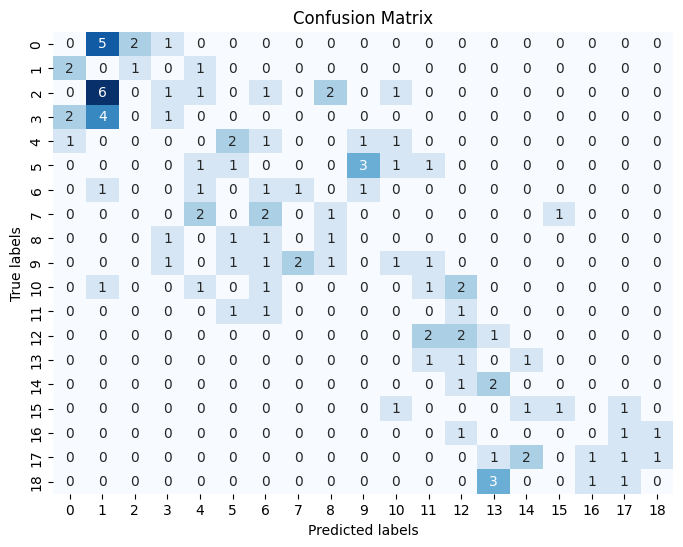

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
score = cross_val_score(ensemble.RandomForestRegressor(random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold are: {score}')
rmse(score.mean())

Scores for each fold are: [-5.97787048 -7.88607212 -4.551575   -6.59020865 -7.45814615]
rmse= 2.55


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
bosque = RandomForestClassifier()

In [ ]:
bosque.fit(df[["numcol","yieldpercol","totalprod","stocks","priceperlb","prodvalue" ]].values,
          df["year"].values)

RandomForestClassifier()

In [ ]:
print(bosque.score(df[["numcol","yieldpercol","totalprod","stocks","priceperlb","prodvalue" ]].values,
          df["year"].values))

1.0


In [ ]:
print(cross_val_score(bosque,
                     df[["numcol","yieldpercol","totalprod","stocks","priceperlb","prodvalue" ]].values,
          df["year"].values,
                     cv=10).mean())

0.1476415094339623


CONCLUSIÓNES
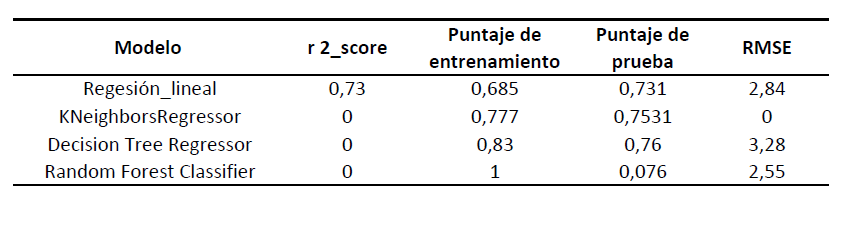







De acuerdo con las metricas obtenidas de cada modelo evaluado, el modelo mas estable seria Decision Tree Regressor debido a que tiene los valores mas cercanos a 1.
 En cuanto al modelo Random Forest classifier es el menos adecado ya que su accuary fue muy bajo.
 En cuanto al PCA , no es un buen metodo para agrupar las variables del dataset estudiado ya que sus metricas son muy bajas.Ademas al graficar no se evidencian grupos

# **PCA MODELO **

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pca = PCA(n_components=2)  # Reducimos la dimensionalidad a 2 componentes principales
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
# Creamos un modelo de regresión lineal
model = LinearRegression()

In [ ]:
# Entrenamos el modelo
model.fit(X_train_pca, y_train)

LinearRegression()

In [ ]:
# Calculamos los puntajes de entrenamiento y prueba
train_score = model.score(X_train_pca, y_train)
test_score = model.score(X_test_pca, y_test)

In [ ]:
print("Puntaje de entrenamiento:", train_score)
print("Puntaje de prueba:", test_score)

Puntaje de entrenamiento: 0.43115510735560336
Puntaje de prueba: 0.44136059210943523


In [ ]:
# Realizamos predicciones
y_pred = model.predict(X_test_pca)

In [ ]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

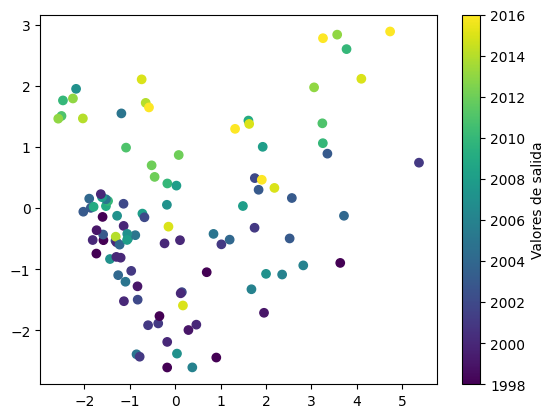

In [ ]:
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', label='Datos de prueba')
plt.colorbar(label='Valores de salida')

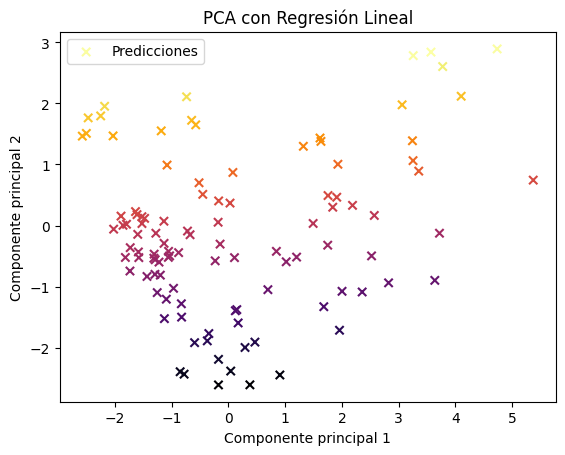

In [ ]:
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='inferno', marker='x', label='Predicciones')

plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('PCA con Regresión Lineal')
plt.legend()
plt.show()